In [1]:
import sys
sys.path.append("../")
from ortho_lib import *
from scipy.stats import entropy
from scipy.signal import correlate2d
import pandas as pd
from scipy.spatial.transform import Rotation as R
import math

In [2]:
directory = '..//transformed_data/'
category = 'Category_3'
patient = '3'
exercise = 'AB1'
file = os.path.join(directory, category, patient, exercise + '.txt')

In [3]:
df = exercise_to_df_with_rotation(file)

df_elbow_left = df[df['sensor'] == '5']
df_elbow_right = df[df['sensor'] == '8']
df_shoulder_left = df[df['sensor'] == '4']
df_shoulder_right = df[df['sensor'] == '7']

df_shoulder_left['acos_z2'] = df_shoulder_left['z2'].apply(math.acos)
df_shoulder_left['acos_z2'] = df_shoulder_left['acos_z2'].apply(math.degrees)
df_shoulder_left.reset_index(inplace=True, drop=True)

df_shoulder_right['acos_z2'] = df_shoulder_right['z2'].apply(math.acos)
df_shoulder_right['acos_z2'] = df_shoulder_right['acos_z2'].apply(math.degrees)
df_shoulder_right.reset_index(inplace=True, drop=True)

#df_shoulder_left

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [4]:
x0, x1, x2, y0, y1, y2, z0, z1, z2 = df.iloc[1][['x0', 'x1', 'x2', 'y0', 'y1', 'y2', 'z0', 'z1', 'z2']]

r = R.from_matrix([[x0, y0, z0],
                  [x1, y1, z1],
                  [x2, y2, z2]])

In [5]:
r.as_euler('XZX', degrees=False)

array([-1.71528399,  1.71678415,  2.36237576])

Text(0.5, 1.0, 'Right arm')

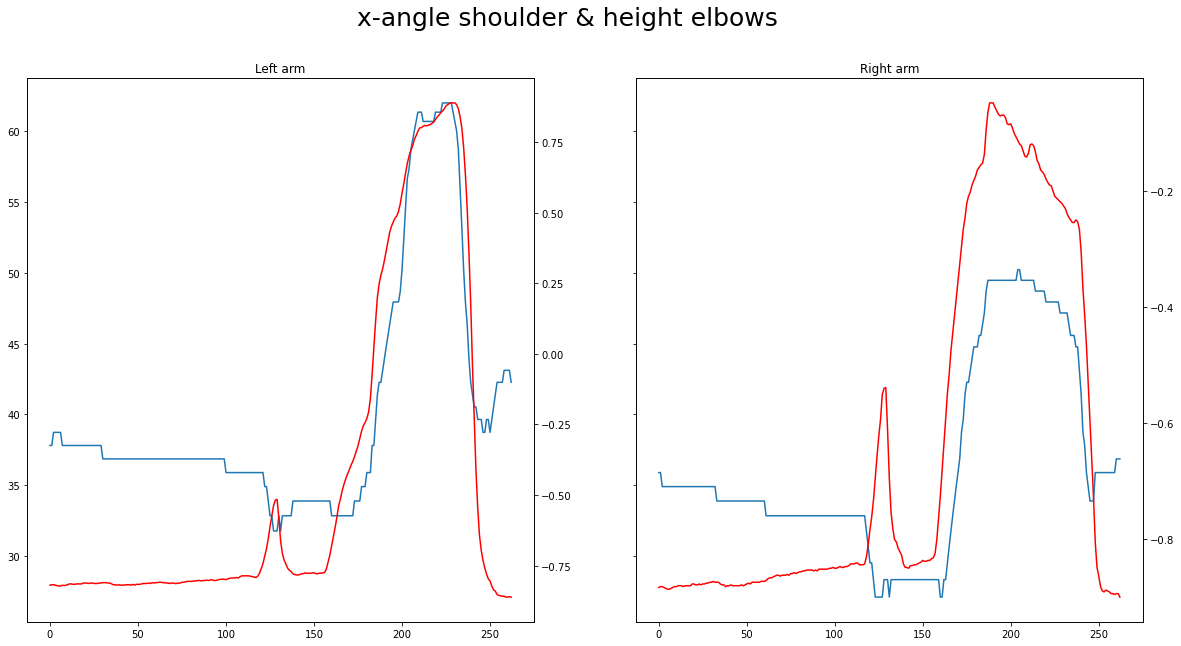

In [6]:
fig, (ax1, ax3) = plt.subplots(1, 2, sharey=True, figsize=(20,10))

ax1.plot(df_shoulder_left['frame'], df_shoulder_left['acos_z2'], label='x-angle shoulder')
ax2 = ax1.twinx()
ax2.plot(df_elbow_left['frame'], df_elbow_left['z'], label='height elbow', color='r')

ax3.plot(df_shoulder_right['frame'], df_shoulder_right['acos_z2'], label='x-angle shoulder')
ax4 = ax3.twinx()
ax4.plot(df_elbow_right['frame'], df_elbow_right['z'], label='height elbow', color='r')

fig.suptitle('x-angle shoulder & height elbows', fontsize=25)
ax1.set_title('Left arm')
ax3.set_title('Right arm')